### Name : Aditya Bhawsar 
### PRN  : 250240128002
### Assignment 2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)  #Set Random Seed for reproducible results
rng = np.random.default_rng(seed=RANDOM_STATE)

NOISE = 0.2
TEST_SIZE = 0.2  #Size of test data
ALPHA = 0.1
N_SAMPLES = 1000
EPOCHS = 1000
X,y = datasets.make_moons(n_samples=N_SAMPLES,shuffle=True,noise=NOISE,random_state=RANDOM_STATE)

In [3]:
data_df = pd.DataFrame(X,columns=['A','B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


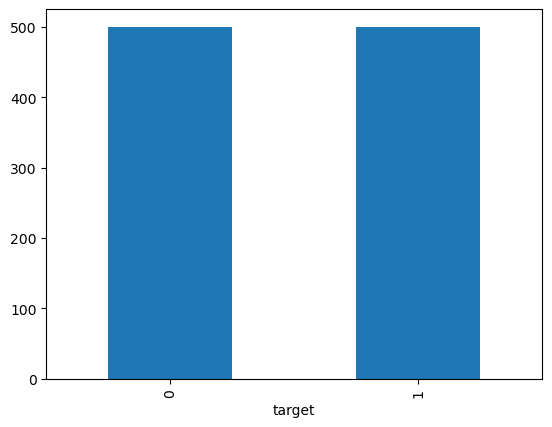

In [4]:
fig, ax = plt.subplots()
data_df['target'].value_counts().plot(ax=ax,kind='bar')
plt.show()

In [5]:
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]
type(data_train), type(data_test)

(numpy.ndarray, numpy.ndarray)

In [6]:
def fn_sigmoid(z):
#   return 1 if z>= 0 else 0
  return 1/(1+np.exp(-z))

In [7]:
def predict(row, weights):

    z = weights[0]

    for i in range(len(row)-1):

        z += weights[i+1]*row[i]  # x1.w1 + x2.w2

    #return 1 if z >= 0 else 0
    return fn_sigmoid(z)

In [8]:
weights = np.array([0.1,2.0,1.0])

display(data_df.loc[0])

predict(data_df.loc[0], weights)


A         0.906340
B         0.902676
target    0.000000
Name: 0, dtype: float64

C:\Users\dai.STUDENTSDC\AppData\Local\Temp\ipykernel_13400\976758968.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z += weights[i+1]*row[i]  # x1.w1 + x2.w2


0.9434999754763397

In [9]:
def train_weights(train,alpha,n_epoch):

    errors = []

    weights = rng.random(train.shape[1])

    m = train.shape[0]

    for epoch in range(n_epoch):
        sum_error = 0.0

        for row in train:
            prediction = predict(row, weights)
            dz = prediction - row[-1]
            error = -row[-1]*np.log(prediction)
            #sum_error += (prediction - row[-1])**2
            sum_error  += error
            weights[0] = weights[0] - alpha * dz/m

            for i in range(len(row) - 1):
                weights[i+1] = weights[i+1] - alpha * dz * row[i]/m
                sum_error += error

        errors.append(sum_error/m)
    return weights, errors

In [10]:
weights, errors = train_weights(data_train, ALPHA, EPOCHS)

display(weights, errors)

array([ 0.2688015 ,  1.18572233, -3.6982601 ])

[0.6669762175702431,
 0.6665664356051756,
 0.6661615498102427,
 0.6657600038946205,
 0.6653603599477169,
 0.6649612954233413,
 0.6645615997657587,
 0.6641601707209747,
 0.6637560103774051,
 0.6633482209803137,
 0.6629360005635826,
 0.6625186384412526,
 0.6620955105995664,
 0.6616660750278595,
 0.6612298670244123,
 0.6607864945102919,
 0.6603356333814863,
 0.659877022926448,
 0.6594104613330614,
 0.6589358013060542,
 0.6584529458127494,
 0.657961843972229,
 0.657462487100246,
 0.6569549049194423,
 0.6564391619423643,
 0.6559153540321966,
 0.6553836051443893,
 0.6548440642504079,
 0.6542969024433968,
 0.653742310223928,
 0.6531804949630564,
 0.6526116785386541,
 0.652036095140315,
 0.6514539892373027,
 0.6508656137035045,
 0.6502712280929113,
 0.6496710970588561,
 0.6490654889099899,
 0.6484546742958682,
 0.6478389250150274,
 0.6472185129383435,
 0.646593709040705,
 0.6459647825340306,
 0.6453320000948939,
 0.6446956251802256,
 0.6440559174248159,
 0.6434131321144807,
 0.6427675197291962

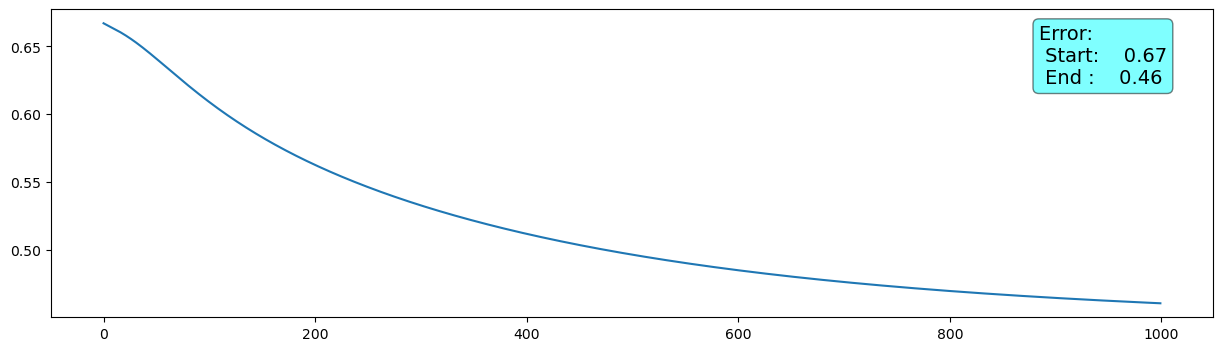

In [11]:
fig,ax = plt.subplots(figsize=(15,4))
txtstr = "Error: \n Start: {:7.2f}\n End : {:7.2f}".format(errors[0],errors[-1])
props = dict(boxstyle='round', facecolor='cyan', alpha=0.5)
ax.text(0.85, 0.95, txtstr.format(errors[0]), transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax.plot(errors)

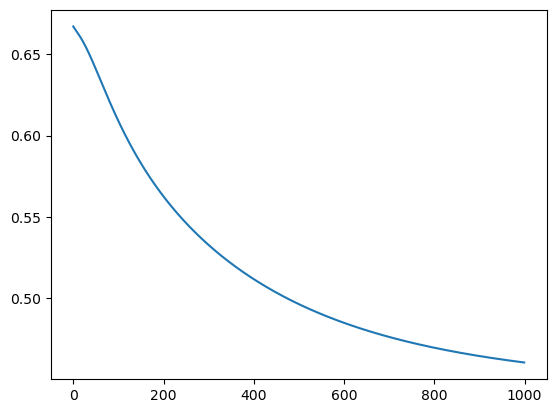

In [12]:
fig, ax = plt.subplots()
ax.plot(errors)

In [13]:
predictions = []
for row in data_train:

    a= predict(row,weights)
    pred = 0
    if a >= 0.5:
        pred = 1

    predictions.append(pred)

print(f'Accuracy: {accuracy_score(data_train[:,-1], predictions):7.4f}')

Accuracy:  0.8633


In [14]:
predictions = []
for row in data_test:
    a= predict(row,weights)
    pred = 0
    if a >= 0.5:
        pred = 1

    predictions.append(pred)

print(f'Accuracy: {accuracy_score(data_test[:,-1], predictions):7.4f}')

Accuracy:  0.8900


In [15]:
cm = confusion_matrix(data_test[:,-1],predictions)
display(cm)

array([[54,  4],
       [ 7, 35]], dtype=int64)

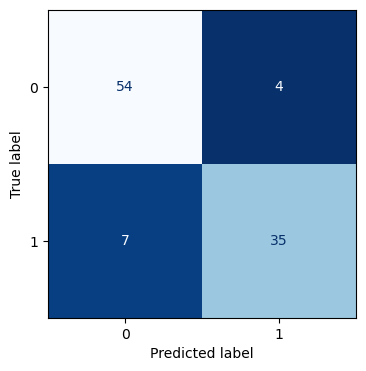

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])

fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= "Blues_r", colorbar=False);



In [17]:
def fn_plot_decision_boundary(X, wts):
    fig, ax = plt.subplots(figsize = (15,5))
    dm = 0.05
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

    xx , yy = np.meshgrid(np.arange(x_min, x_max, dm), np.arange(y_min, y_max, dm))

    XX = np.c_[xx.ravel(), yy.ravel()]
    XX = np.hstack((XX, np.ones((XX.shape[0],1))))

    y_pred = []

    for row in (XX):
        a = predict(row, weights=wts)
        y_p = 0
        if a>=0.5: y_p=1
        y_pred.append(y_p)

    Z = np.array(y_pred).reshape(xx.shape)
    ax.contourf(xx,yy,Z, alpha = 0.6, cmap=plt.cm.Paired)
    ax.scatter(X[:,0], X[:,1], c = X[:,2], s=15, edgecolor='k', cmap=plt.cm.bwr)

    return xx , yy, XX


((71, 103), (71, 103), (7313, 3))

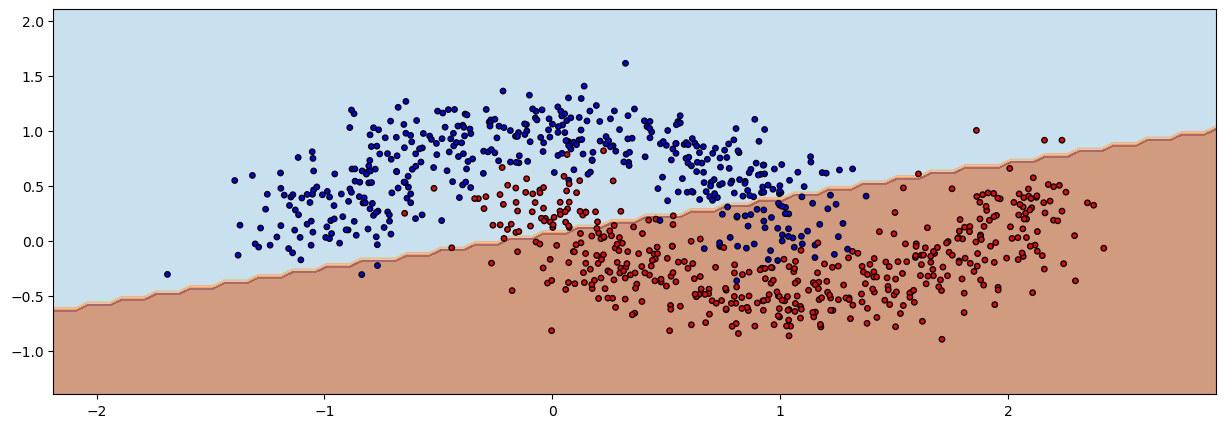

In [18]:
xx , yy, XX = fn_plot_decision_boundary(data_train, weights)
xx.shape, yy.shape, XX.shape